01_data_preprocessing

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import argparse
import logging
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('../Data/heart-disease-data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,False,False,True,True,False,False,False,False
1,37,1,130,250,0,1,187,0,3.5,0,1,False,True,False,False,True,False,False,False
2,41,0,130,204,0,0,172,0,1.4,0,1,True,False,False,False,True,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,1,True,False,False,False,True,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,1,False,False,False,False,True,False,False,True


In [23]:
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # example numeric cols
df[num_cols] = scaler.fit_transform(df[num_cols])

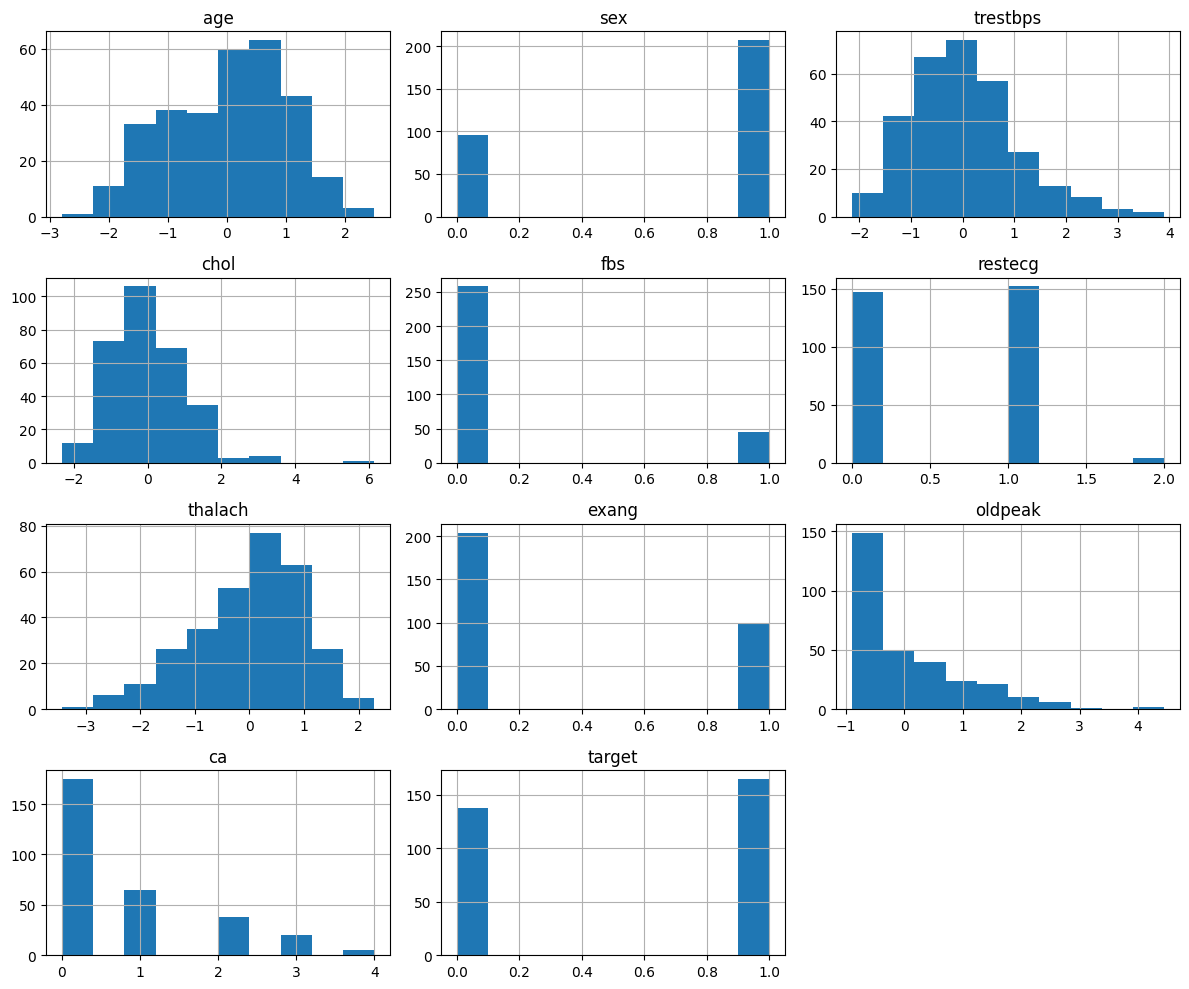

In [24]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

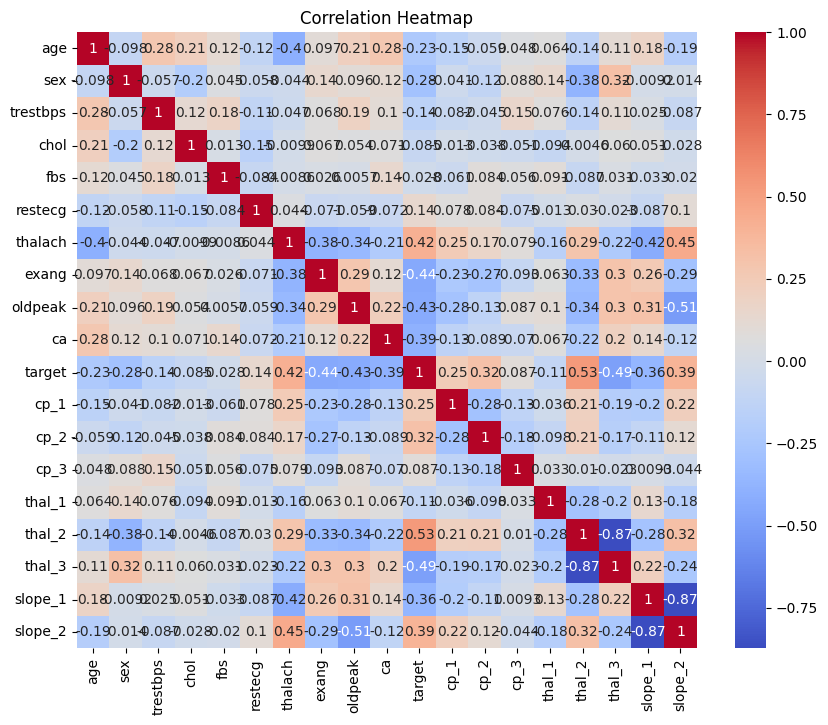

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [27]:
%store df

Stored 'df' (DataFrame)
